## Shapes

As well as points, MuSpAn objects can also be <i>lines</i> or <i>shapes</i>. In this tutorial we focus on <i>shape</i> data. A MuSpAn shape is a 2D region, defined by a (non-self intersecting) boundary and, if desired, internal boundaries. A shape can be added by specifying an ordered list or array of (nx2) points that define the boundary. Let's make a shape:

(<Figure size 800x500 with 2 Axes>, <Axes: >)

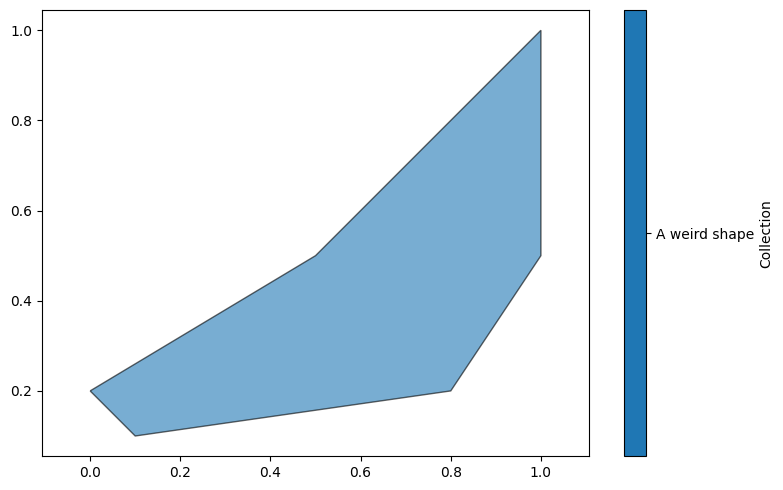

In [1]:
# Import necessary libraries for data handling and visualization
import muspan as ms
import numpy as np
import matplotlib.pyplot as plt

# Create a new domain for the tutorial
domain = ms.domain('Tutorial 3')

# Define a set of points to create a shape
points = np.asarray([[0.1, 0.1], [0.8, 0.2], [1, 0.5], [1, 1], [0.5, 0.5], [0, 0.2]])

# Add the shape to the domain
domain.add_shapes([points], 'A weird shape')

# Visualize the domain with the added shape
plt.figure(figsize=(8, 5))
ms.visualise.visualise(domain, ax=plt.gca())

Let's make a circle and add it to the domain.

(<Figure size 800x500 with 2 Axes>, <Axes: >)

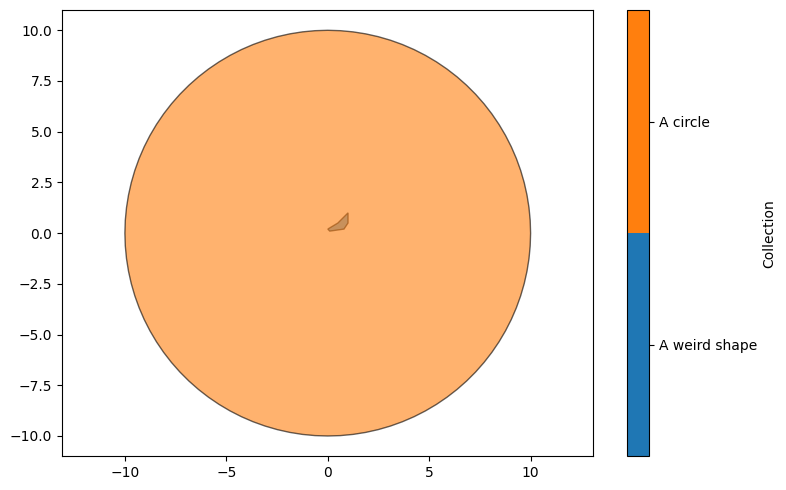

In [2]:
# Function to create a circle shape
def make_circle(centre, radius, nVerts=100):
    pts = []
    for v in range(nVerts):
        theta = v * 2 * np.pi / nVerts
        pts.append([radius * np.cos(theta), radius * np.sin(theta)])
    pts = pts + np.asarray(centre)
    return np.asarray(pts)

# Create a circle with center at [0,0] and radius 10
circle = make_circle([0, 0], 10)

# Add the circle shape to the domain
domain.add_shapes([circle], 'A circle')

# Visualize the domain with the added circle
plt.figure(figsize=(8, 5))
ms.visualise.visualise(domain, ax=plt.gca())

We can add multiple shapes at once by simply including them all at once. The first argument for ```add_shapes``` is a list of arrays, each of which can be a different length.

(<Figure size 800x500 with 2 Axes>, <Axes: >)

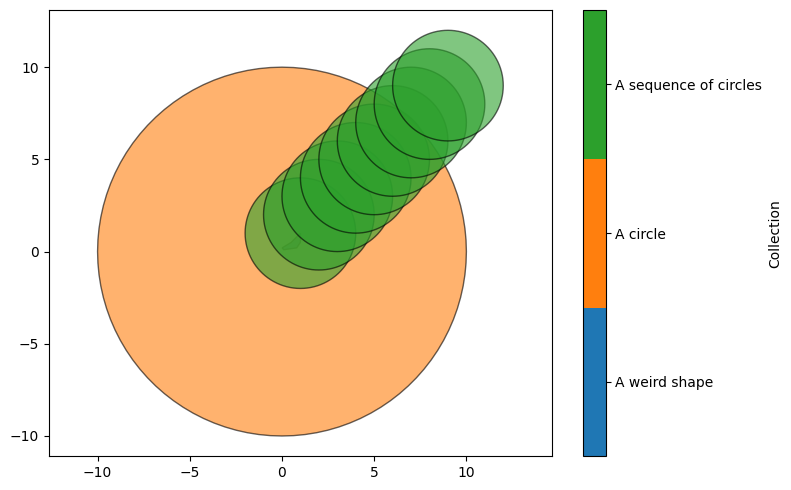

In [3]:
# Create a list to store multiple circle shapes
list_of_circles = []

# Generate and add circles to the list
for i in range(1, 10):
    circle = make_circle([i, i], 3)  # Create a circle with center at [i, i] and radius 3
    list_of_circles.append(circle)   # Append the circle to the list

# Add the list of circles to the domain
domain.add_shapes(list_of_circles, 'A sequence of circles')

# Visualize the domain with the added sequence of circles
plt.figure(figsize=(8, 5))
ms.visualise.visualise(domain, ax=plt.gca())

Shapes can also have internal holes. In this case, we can add shapes using ```domain.add_shapes_with_internal_holes(shape_hole_pairs,'Name')```, where each entry in the list ```shape_hole_pairs``` has the structure ```[outer_boundary, [inner_boundaries]]```.

Reversing components of anti-clockwise oriented polygon (internal boundary)
Reversing components of anti-clockwise oriented polygon (internal boundary)


(<Figure size 800x500 with 2 Axes>, <Axes: >)

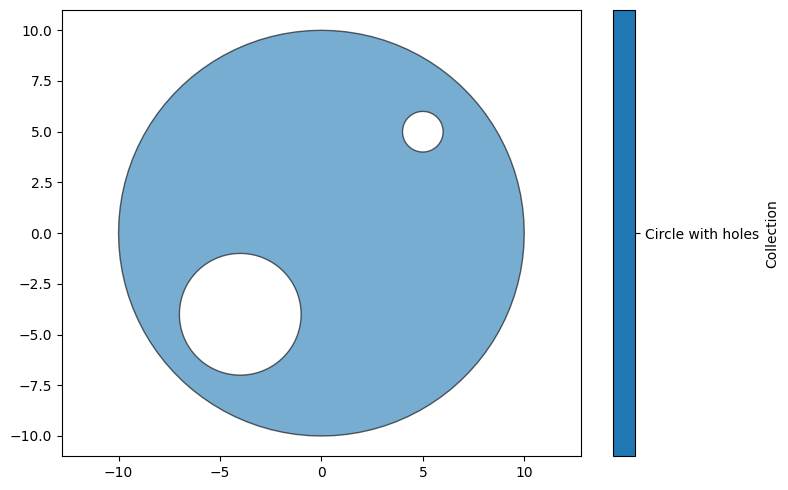

In [4]:
# Create a new domain for the example
clean_domain = ms.domain('Another domain')

# Define the outer boundary of the shape (a large circle)
outer = make_circle([0, 0], 10)

# Define the inner boundaries (smaller circles) to create holes
inner_1 = make_circle([5, 5], 1)
inner_2 = make_circle([-4, -4], 3)

# Add the shape with internal holes to the domain
clean_domain.add_shapes_with_internal_holes([[outer, [inner_1, inner_2]]], 'Circle with holes')

# Visualize the domain with the added shape and its internal holes
plt.figure(figsize=(8, 5))
ms.visualise.visualise(clean_domain, ax=plt.gca())